# Rdionica: priprema datoteke `podaci_upitnik.csv` za obradu

In [12]:
options(repr.matrix.max.cols = 120, repr.matrix.max.rows = 500,
       repr.plot.height = 4, repr.plot.width = 4)

U ovom dijelu radionice proći ćemo put od sirovih podataka do podataka na kojima možemo provesti analizu.

Prije nego što se bacimo na učitavanje i proučavanje sirovih podataka, učitat ćemo pakete koje ćemo koristiti.

Pakete učitavamo pozivanjem funkcije `library`, koja kao argument prima ime **jednog** paketa.

In [2]:
# skupina paketa koja sadrži većinu paketa koje
# ćemo koristiti za baratanje podacima
library(tidyverse)

# paket koji sadrži 'pipe' operatore
library(magrittr)

# upozorava na konflikte u imenima funkcija
# koji se javljaju kad više paketa koristi isto
# ime
library(conflicted)

# omogućava učitavanje .SAV fielova
library(foreign)

# paket koji sadrži neke zgodne olakšice
library(wrapr)

# olakšava korištenje relativnih file pathova
library(here)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.7
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /home/denis/Documents/rdionica


## Učitavanje podatka

Za početak, pogledat ćemo kako izgledaju naši sirovi podaci.

A da bismo to učinili, prvo ih moramo učitati u R.

Pogledat ćemo kako učitati tri vrste datoteka: SPSS-ov `.sav`, Excelov `.xls/xlsx` te generički *comma separated values* file - `.csv`.

### SPSS - .sav

### Excel - .xls(x)

### Comma separated values - .csv

*Comma separeted value* datoteke su točno to što ime kaže - podaci koji su strukturirani kao vrijednosti odvojene zarezima, gdje se svaki unos (na primjer sudionik) nalazi u zasebnom redu, a vrijednosti varijabli koje su uz njega povezane ispisane su redom i odvojene su zarezima.

U prvom redu (koji funkcije u R-u često nazivaju **header**) obično se nalaze imena varijabli, a u ostalim redovima su njihove vrijednosti.

Ovako izgledaju prva dva reda i prvih nekoliko stupaca datoteke `podaci_upitnik.csv`:

```
attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03, ...
5,5,5,5,4, ...
```

Podatke u `.csv` formatu možemo učitati pomoću funkcije `read_csv` iz `readr` paketa (koji je automatski učitan kad smo učitali `tidyverse`). Osnovni (base) R ima funkciju `read.csv` koja obavlja isti zadatak, ali neki R developeri preporučuju korištenje `read_csv` funkcije (na primjer, Hadley Wickham i Garret Grolemund: http://r4ds.had.co.nz/import.html).

U skladu s tom preporukom, koristit ćemo `read_csv`. Podatke iz datoteke `podaci_upitnik.csv` možemo učitati ovako:

In [3]:
podaci <- read_csv(file = here('podaci', 'podaci_upitnik.csv'))

Parsed with column specification:
cols(
  .default = col_integer(),
  pi_education = col_character(),
  pi_gender = col_character(),
  pi_ideology = col_character(),
  pi_income = col_character(),
  pi_nationality = col_character(),
  pi_previousDonations = col_character()
)
See spec(...) for full column specifications.


Poruka koju dobivamo obavještava nas o tome kako su određene varijable reprezentirane. Vidimo da su varijable koje počinju s `pi` reprezentirane kao `character`. Ako pozovemo funkciju `spec`, vidjet ćemo specifikacije svih varijabli.

Budući da pozivanjem funkcije `str` zapravo dobivamo manje-više iste podatke, pozvat ćemo samo nju. Njen output pomoći će nam da vidimo jesu li podaci reprezentirani onako kako bismo očekivali.

In [ ]:
str(podaci)

Obrisat ćemo specifikacije varijabli da ne zakrčuju output.

Funkcije `head` i `tail` omogućuju nam da na brzinu vidimo (po defaultu) prvih 6 odnosno posljednjih 6 redova tablice.

In [68]:
attr(podaci, 'spec') <- NULL

In [ ]:
head(podaci)

In [ ]:
tail(podaci, 3)

Ove funkcije pomažu nam pri pregledavanju strukture podataka i njihovih sirovih vrijednosti.

Osnovnu deskriptivnu statistiku možemo dobiti pomoću generičke funkcije `summary`. Generičke funkcije primaju objekte različitih tipova, a njihov output ovisi o tipu objekta. Primjerice, ako u `summary` stavimo `data.frame`, dobit ćemo grubu deskriptivnu statistiku njegovih stupaca. Ako u funkciju stavimo regresijski model, dobit ćemo informacije o modelu.

Dobro je znati i za funkciju `describe` iz paketa `psych`, koja daje dosta detaljniju deskriptivnu statistiku numeričkih varijabli.

Idemo vidjeti output tih dviju funkcija kad u nju stavimo neke numeričke i neke kategorijalne (`factor`) stupce iz našeg `data.framea` `podaci`.

In [4]:
summary(podaci[, wrapr::qc(attitudesAndNorms01, pi_education, pi_gender)])

 attitudesAndNorms01 pi_education        pi_gender        
 Min.   :2.00        Length:100         Length:100        
 1st Qu.:4.00        Class :character   Class :character  
 Median :5.00        Mode  :character   Mode  :character  
 Mean   :5.04                                             
 3rd Qu.:6.00                                             
 Max.   :8.00                                             

Vidimo tri stvari: (1) `summary` nije pretjerano koristan za varijable koje su tipa `character` i (2-3) pojavili su se nova sintaksa i nova funkcija.

`qc` je funkcija iz paketa `wrapr` koja nas oslobađa pisanja navodnika pri korištenju funkcije `c`. `qc` je, dakle, *quoted combine*.

Korištenjem `::` sintakse označili smo da je funkcija `qc` iz paketa `wrapr`. Pri pozivanju funkcija iz drugih paketa **nije nužno** pisati `::`; to smo vidjeli i kod pozivanja funkcije `read_csv` iz paketa `readr`.

Ipak, važno je znati tu sintaksu iz dva razloga.

Prvo, korištenjem `::` možemo pozvati funkciju iz paketa koji prethodno nismo učitali (što ćemo vidjeti pri pozivanju funkcije `describe`.

Drugo, u slučaju da dva paketa imaju funkcije koje se jednako zovu, `::` nam omogućava da specificiramo koju funkciju želimo pozvati. Budući da smo učitali paket `conflicted`, R će nas upozoriti ako dođe do konflikta te nas tražiti da specificiramo koju funkciju hoćemo pozvati, koristeći `::`.

Sad ćemo pogledati output funkcije `describe` na tim istim varijablama.

Nastavit ću koristiti `::` notaciju tako da bude jasno iz kojeg paketa dolazi koja funkcija (osim ako je spomenuto u tekstu ili ako je funkcija iz base R-a).

**BAM-BAM PIPE**

In [57]:
podaci %>%
dplyr::select(attitudesAndNorms01, pi_education, pi_gender) %>%
psych::describe(.)

Warning message in psych::describe(.):
“NAs introduced by coercion”Warning message in psych::describe(.):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
attitudesAndNorms01,1,100,5.04,1.427861,5,5.0625,1.4826,2,8,6,-0.1931472,-0.5916736,0.1427861
pi_education*,2,100,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
pi_gender*,3,100,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


I dalje nije korisno za `character` varijable, ali omogućava digresiju u svijet pipa.

## Pipe

Pipe su posebni operatori iz `magrittr` paketa. One omogućavaju kraće i, često, razumljivije pisanje koda.

Pipa uzima output izraza sa svoje lijeve strane i daje ga kao argument funkciji na svojoj desnoj strani.

Osnovna pipa je `%>%`. Ona se nalazi i u paketu `dplyr` (koji se učitava kad učitamo `tidyverse`) i u paketu `magrittr`. Posebno smo učitali `magrittr` jer s njim dolaze i neke pipe kojih nema u `dplyru`.

Sad ćemo proći kroz pipe koje `magrittr` nudi.

### %>%

Kao što je rečeno, ovo je osnovna pipa. Ona uzima output izraza s lijeve strane i koristi ga kao input za izraz s desne strane.

Dakle:

In [8]:
(2 + 2) %>% sqrt(.)

(2 + 2) %>% sqrt()

(2 + 2) %>% sqrt

sqrt(2 + 2)

[1] 2

[1] 2

[1] 2

[1] 2

Trenutačno ne izgleda kao neka ušteda, što je u redu. Kasnije ćemo vidjeti primjere u kojima su pipe dosta zgodnije.

Kod korištenja pipa, `.` označava output iz funkcije s lijeve strane. Po defaultu, pipa će točku staviti na mjesto prvog argumenta. Takav default uglavnom jako dobro funkcionira s funkcijama iz `tidyversea` jer one imaju dosta uniformnu sintaksu, koja je prilagođena za pipe.

Ipak, nekad takvo ponašanje nije poželjno. Pokušajmo grafirati dva brojčana vektora - jedan od njih ćemo spremiti u varijablu, a drugi ćemo direktno dati pipi.

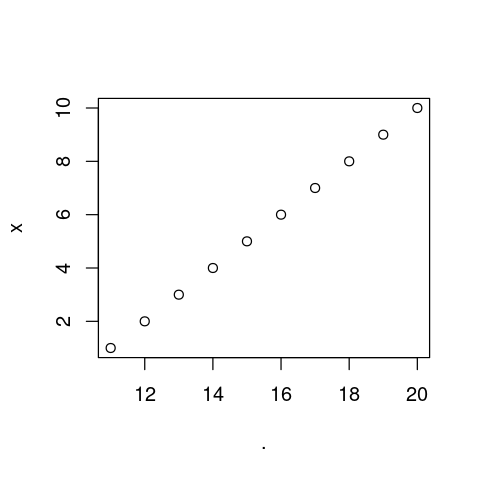

In [21]:
# ova vrijednost treba ići na x os
x <- 1:10

# vektor koji ćemo sad stvoriti treba ići na y os
# ovaj kod jednak je ovom -> 11:20 %>% plot(., x)
# plot je također generička funkcija
11:20 %>% plot(x)

Vidimo da je pipa stavila svoje vrijednosti na prvo mjesto, a time i na x os. Da bismo spriječili takvo defaultno ponašanje pipe, izraz s desne strane možemo staviti u vitičaste zagrade (`{}`).

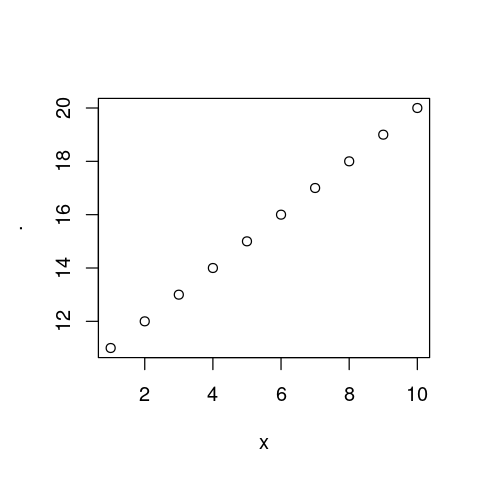

In [22]:
11:20 %>% {plot(x, .)}

Sad ćemo `x` staviti u `data.frame` i pridružiti mu `y`.

In [26]:
za_graf <- data.frame(x = 1:10, y = 11:20)

str(za_graf)

'data.frame':	10 obs. of  2 variables:
 $ x: int  1 2 3 4 5 6 7 8 9 10
 $ y: int  11 12 13 14 15 16 17 18 19 20


Ponovno ćemo pokušati plotati vrijednosti tako što `za_graf` stavimo u pipu.

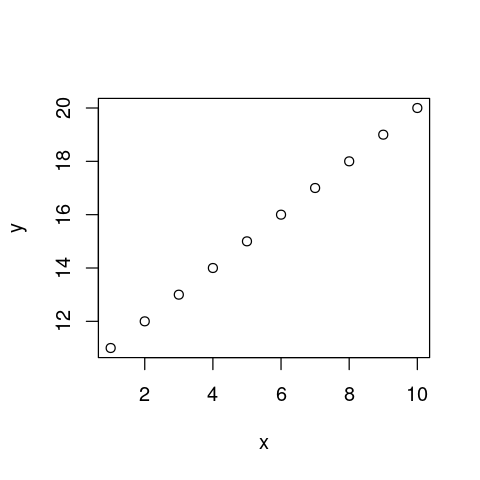

In [27]:
za_graf %>% plot()

Da bismo zamijenili osi, možemo učiniti sljedeće:

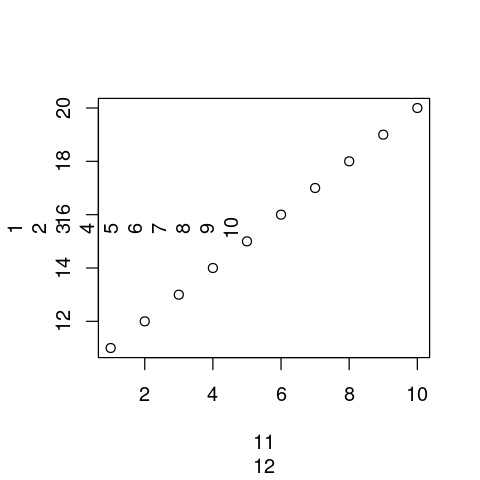

In [30]:
za_graf %>% plot(.$y, .$x)

To jest, ne možemo jer se gornji kod interpretira kao
```
za_graf %>% plot(., .$y, .$x)
```

Dakle, ponovno možemo izraz s desne strane opkoliti vitičastim zagradama.

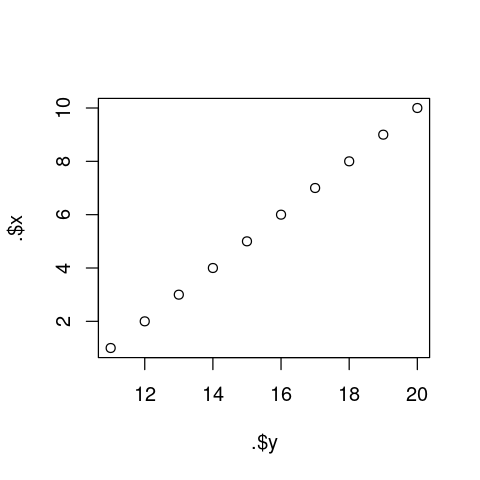

In [31]:
za_graf %>% {plot(.$y, .$x)}

Da se smanje takve konfuzije, neki preporučuju da se `.` uvijek piše, tako da je to praksa koju ćemo ovdje usvojiti.

No, osim zatvaranja izraza s desne strane u zagrade, možemo iskoristiti jednu drugu pipu.

### %$%

`%$%` je *variable exposition* pipa. Ona nam daje direktan pristup varijablama koje se nalaze u objektu kojim baratamo.

Gornji problem mogli bismo riješiti i ovako:

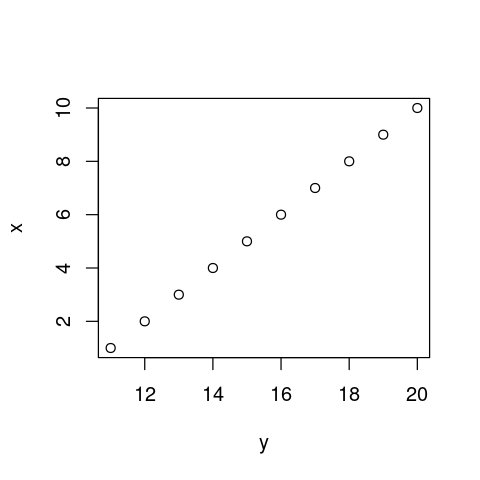

In [32]:
za_graf %$% plot(y, x)

Možemo kombinirati različite pipe. Na primjer:

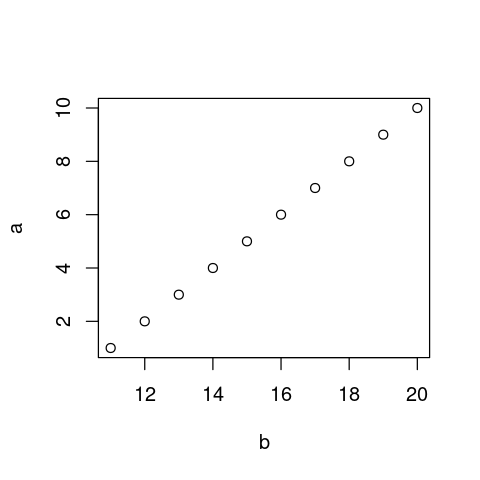

In [36]:
1:10 %>% data.frame(a = ., b = 11:20) %$% plot(b, a)

U gornjem primjeru bi nam možda bilo zgodno da možemo pogledati strukturu `data.framea` nakon što ga stvorimo ili napraviti još neke operacije nakon što plotamo varijable.

Na sreću, imamo pipu i za to.

### %T>%

T-pipa (izvorno *tee*) vraća izraz s lijeve strane umjesto izraza s desne strane. Zbog toga, možemo učiniti sljedeće:

'data.frame':	10 obs. of  2 variables:
 $ a: int  1 2 3 4 5 6 7 8 9 10
 $ b: int  11 12 13 14 15 16 17 18 19 20


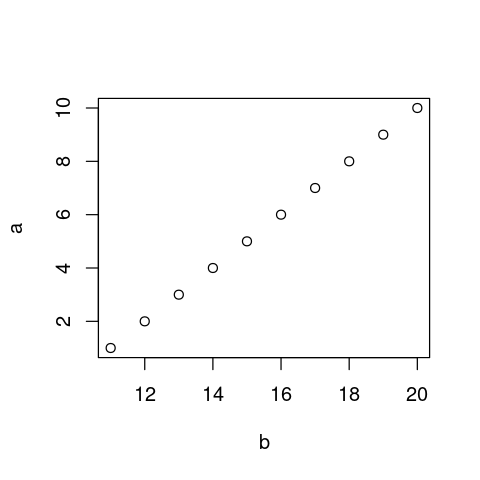

In [37]:
1:10 %>% data.frame(a = ., b = 11:20) %T>% str %$% plot(b, a)

[1] 210

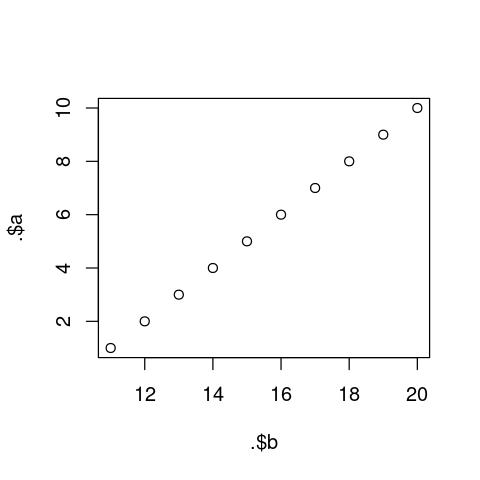

In [42]:
1:10 %>% data.frame(a = ., b = 11:20) %T>%
{plot(.$b, .$a)} %$%
sum(a,b)

Preostaje nam još jedna pipa...

### %<>%

`%<>%` je *assignment* pipa. Ona istovremeno uzima i piše u vrijednost s lijeve strane. To nam omogućuje da neku varijablu provučemo kroz seriju transformacijskih koraka.

In [58]:
za_graf$x %<>% magrittr::add(., 2) %>%
magrittr::multiply_by(., 2) %>% sqrt(.)

str(za_graf)

'data.frame':	10 obs. of  2 variables:
 $ x: num  3.21 3.22 3.23 3.24 3.25 ...
 $ y: int  11 12 13 14 15 16 17 18 19 20


Ovime završavamo upoznavanje s pipama. Nakratko se vraćamo natrag na primjer s funkcijom `describe`, nakon čega ponovno odlazimo u uzbudljivu digresiju.

## dplyr::select i dplyr::filter

Već smo ranije vidjeli funkciju `select`, koja nam je omogućila da izaberemo 3 od 64 stupca iz `data.framea` `podaci`. Za odabiranje pojedinih redova koji zadovoljavaju određeni logički izraz možemo koristiti funkciju `filter`.

Sad ćemo prikazati deskriptivnu statistiku za pitanja koja tvore jednu od skala koja se nalazi u našim podacima - skalu internalizacije moralnog identiteta - samo na poduzorku žena.

Sve varijable koje se odnose na tu skalu imaju ime oblika `moralIdentityInternalization<broj-pitanja>`. Zbog tog sustavnog imenovanja, ne moramo ispisivati imena (ili redne brojeve) svih varijabli koje želimo zahvatiti funkcijom `describe`, nego možemo pozvati funkciju `contains` unutar funkcije `select`.

`contains` na omogućuje da odaberemo samo one varijable koje sadrže zadani string.

In [72]:
podaci %>%
dplyr::filter(., pi_gender == 'Female') %>%
dplyr::select(., contains('internal', ignore.case = T)) %T>% str(.) %>%
psych::describe(.)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	45 obs. of  5 variables:
 $ moralIdentityInternalization01: int  4 5 5 4 4 5 4 6 6 5 ...
 $ moralIdentityInternalization02: int  3 5 5 3 3 3 3 5 6 3 ...
 $ moralIdentityInternalization03: int  1 1 1 1 1 1 1 1 1 1 ...
 $ moralIdentityInternalization04: int  2 3 1 2 4 2 2 1 1 2 ...
 $ moralIdentityInternalization05: int  4 5 5 4 2 4 4 6 6 5 ...


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
moralIdentityInternalization01,1,45,4.711111,0.6613424,5,4.675676,0.0000,3,6,3,-0.09499871,-0.2560002,0.0985871
moralIdentityInternalization02,2,45,4.177778,1.0288760,4,4.081081,1.4826,3,7,4,0.63057485,-0.2803328,0.1533758
moralIdentityInternalization03,3,45,1.000000,0.0000000,1,1.000000,0.0000,1,1,0,NaN,NaN,0.0000000
moralIdentityInternalization04,4,45,1.488889,0.8692270,1,1.459459,1.4826,0,4,4,0.33779878,0.2010560,0.1295767
moralIdentityInternalization05,5,45,4.488889,0.9200351,4,4.513514,1.4826,2,6,4,-0.22495256,-0.1641706,0.1371507


In [71]:
# base R rješenje za usporedbu
psych::describe(podaci[podaci$pi_gender == 'Female', qc(moralIdentityInternalization01,
                                                moralIdentityInternalization02,
                                                moralIdentityInternalization03,
                                                moralIdentityInternalization04,
                                                moralIdentityInternalization05)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
moralIdentityInternalization01,1,45,4.711111,0.6613424,5,4.675676,0.0000,3,6,3,-0.09499871,-0.2560002,0.0985871
moralIdentityInternalization02,2,45,4.177778,1.0288760,4,4.081081,1.4826,3,7,4,0.63057485,-0.2803328,0.1533758
moralIdentityInternalization03,3,45,1.000000,0.0000000,1,1.000000,0.0000,1,1,0,NaN,NaN,0.0000000
moralIdentityInternalization04,4,45,1.488889,0.8692270,1,1.459459,1.4826,0,4,4,0.33779878,0.2010560,0.1295767
moralIdentityInternalization05,5,45,4.488889,0.9200351,4,4.513514,1.4826,2,6,4,-0.22495256,-0.1641706,0.1371507


`contains` je jedna od nekoliko pomoćnih funkcija koje su super za `select`. Druge su:
- `starts_with`, koja odabire varijable koje počinju s određenim stringom
- `ends_with`, isto, samo za kraj
- `one_of`, koju treba koristiti kad `selectu` dajemo `character` vektor
- `matches`, koji nas uvodi u digresiju o regularnim izrazima!

## Regularni izrazi

## Reference

Grolemund, G. i Wickham, H. *R for data science*. O'Reilly Media, Inc.

Pipe
- https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html
- http://r4ds.had.co.nz/pipes.html

## Epilog

In [ ]:
sessionInfo() 